### Loading data

Used app: https://play.google.com/store/apps/details?id=com.fivasim.androsensor&hl=en

In [1]:
import math

import pandas as pd
import numpy as np

from scipy import fftpack
from scipy import signal
from scipy.io import wavfile

import matplotlib
import matplotlib.pyplot as plt

In [25]:
def _read_old_csv(fname):

    headers = [
        "ax", "ay", "az",           # Acceleration (m/s²)
        "gvx", "gvy", "gvz",        # Gravity (m/s²)
        "lax", "lay", "laz",        # Linear Acceleration  (m/s²)
        "gyx", "gyy", "gyz",        # Gyroscope (°/s)
        "lux", "prox", "t", "ts",
    ]
    
    df = pd.read_csv(fname, skiprows=1, names=headers)
    
    # Move t & ts columns to front
    cols = df.columns.tolist()
    cols = cols[-2:] + cols[:-2]
    df = df[cols]
    
    return df

In [23]:
def magnitude(df, sensor):
    x2 = df[sensor + 'x'] * df[sensor + 'x']
    y2 = df[sensor + 'y'] * df[sensor + 'y']
    z2 = df[sensor + 'z'] * df[sensor + 'z']
    m2 = x2 + y2 + z2
    m = m2.apply(lambda x: math.sqrt(x))
    return m


def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_xlim([min(x), max(x)])
    
    mu = np.mean(y)
    std = np.std(y)
    
    ax.set_ylim([min(y) - std, max(y) + std])
    ax.set_title(title + " - Mean: %.2f, Std Dev: %.2f" % (mu, std))
    
    ax.xaxis.set_visible(False)
    ax.grid(True)
    
def plot_data(df, sensor, title):
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(15, 10), sharex=True)
    plot_axis(ax0, df['t'], df[sensor + 'x'], 'x Axis')
    plot_axis(ax1, df['t'], df[sensor + 'y'], 'y Axis')
    plot_axis(ax2, df['t'], df[sensor + 'z'], 'z Axis')
    plot_axis(ax3, df['t'], magnitude(df, sensor), "Magnitude")
    
    duration = (df['t'][df['t'].index[-1]] - df['t'][0]) / 60000
    plt.suptitle(title + " - %.2f minutes" % duration)
        
    plt.subplots_adjust(hspace=0.2)
    plt.show()

    
def plot_csv(df):
    plot_data(df, "a", "Accelerometer")
    # plot_data(df, "gv", "Gravity")
    # plot_data(df, "la", "Linear Acceleration")
#     plot_data(df, "gy", "Gyroscope")

In [26]:
still = read_csv("data/Still_Sensor_record_20180129_165941_AndroSensor.csv")
song = read_csv("data/Song_Sensor_record_20180129_170250_AndroSensor.csv")
alarm = read_csv("data/Alarm_Sensor_record_20180129_172756_AndroSensor.csv")

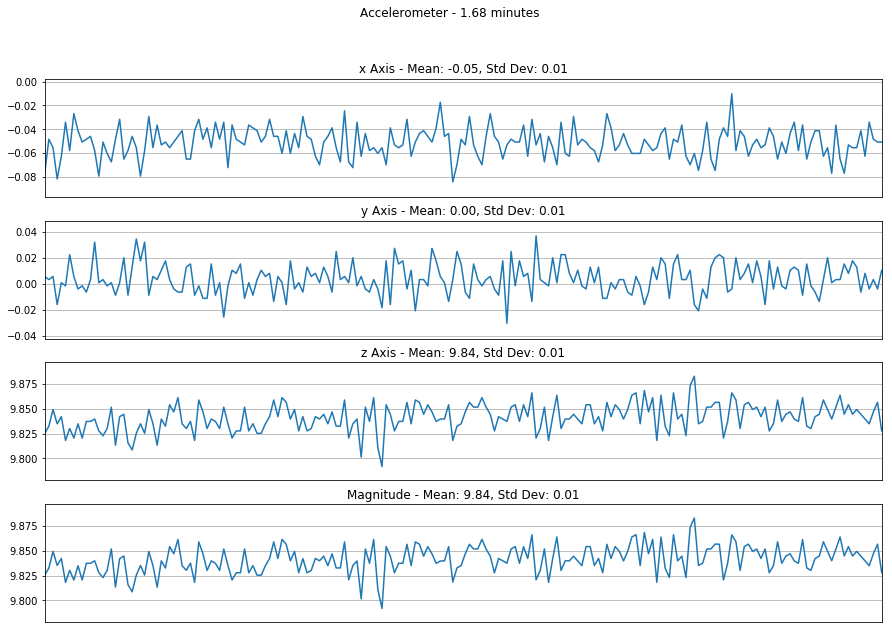

In [6]:
# Try to make lengths equal
still = still[:-125]
plot_csv(still)

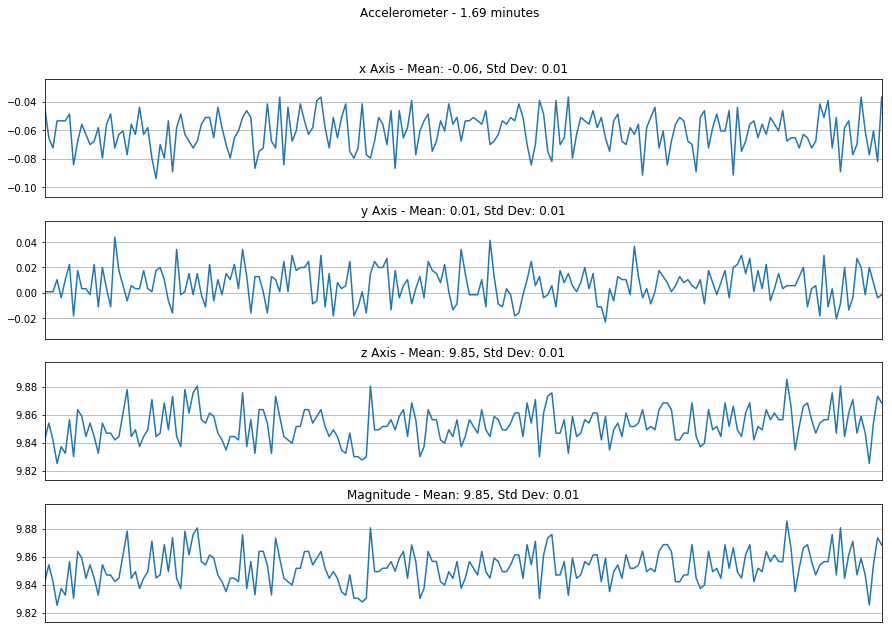

In [22]:
plot_csv(song)

In [ ]:
alarm = alarm[:200]
plot_csv(alarm)

## FFT

0.00125


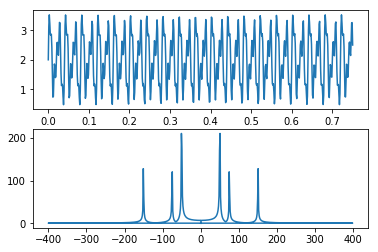

In [17]:
# Number of samplepoints
N = 600

# sample spacing
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) 
y += 0.5*np.sin(75.0 * 2.0*np.pi*x)
y += 0.5*np.sin(150.0 * 2.0*np.pi*x) + 2

# Create two plots for time and frequncey domain data
fig, (ax0, ax1) = plt.subplots(nrows=2)

ax0.plot(x, y)

y = y - y.mean()

sinx = y

# Compute the FFT
yf = np.abs(fftpack.fft(y))
xf = fftpack.fftfreq(len(y), T)

print(T)

ax1.plot(xf, yf)

plt.show()

In [44]:
x = 


600

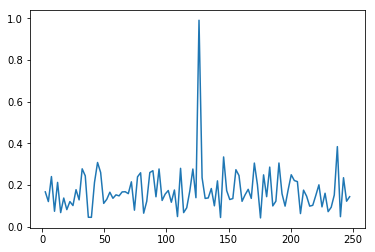

In [60]:
DF = still

# y = magnitude(DF, 'a')
y = DF['ax']

# x = np.linspace(0.0, N*T, N)
x = np.linspace(0.0, len(y)/500, len(y))
siny = 0.01 * np.sin(250 * np.pi * x) 

y = y - y.mean()
y += siny
# y = y + siny[249:-149]

# yf = np.abs(fftpack.fft(y)) ** 2
yf = np.abs(fftpack.fft(y))
xf = fftpack.fftfreq(len(y), 1/500)

idx = np.where(xf > 0)
yf = yf[idx]
xf = xf[idx]

# plot_csv(still)

plt.plot(xf, yf)
plt.show()

In [25]:
song

,t,ts,ax,ay,az,gvx,gvy,gvz,lax,lay,laz,gyx,gyy,gyz,lux,prox
0,5,2018-01-29 17:01:08:997,-0.043701,0.000778,9.842010,-0.060792,0.006805,9.806459,0.017361,-0.006057,-0.008064,-0.1049,0.0227,0.0472,87.0,5.0
1,505,2018-01-29 17:01:09:497,-0.065247,0.000778,9.853973,-0.061451,0.007180,9.806455,-0.003530,-0.006433,0.005248,0.1749,0.0227,-0.0236,87.0,5.0
2,1005,2018-01-29 17:01:09:997,-0.072418,0.000778,9.842010,-0.059486,0.006676,9.806468,-0.012307,-0.006026,-0.007252,-0.0341,0.0927,-0.0927,87.0,5.0
3,1505,2018-01-29 17:01:10:497,-0.053284,0.010345,9.825256,-0.061073,0.006536,9.806458,0.008066,0.003780,-0.025582,-0.0341,-0.0472,0.0472,82.0,5.0
4,2005,2018-01-29 17:01:10:997,-0.053284,-0.004013,9.837219,-0.061184,0.006440,9.806458,0.008173,-0.010482,-0.012943,-0.0341,-0.1172,-0.0236,87.0,5.0
5,2505,2018-01-29 17:01:11:497,-0.053284,0.010345,9.832443,-0.059917,0.004736,9.806466,0.006982,0.005767,-0.017722,0.0350,0.0227,-0.0236,87.0,5.0
6,3005,2018-01-29 17:01:11:997,-0.048492,0.022308,9.856369,-0.058431,0.005609,9.806475,0.010199,0.016674,0.006258,0.0350,0.0227,-0.0236,87.0,5.0
7,3505,2018-01-29 17:01:12:497,-0.084381,-0.018372,9.830048,-0.060381,0.005593,9.806462,-0.023725,-0.023990,-0.020939,-0.0341,0.0927,0.0472,87.0,5.0
8,4005,2018-01-29 17:01:12:997,-0.067627,0.017532,9.863541,-0.061473,0.005708,9.806456,-0.005835,0.011969,0.011592,-0.0341,0.0927,0.0472,87.0,5.0
9,4505,2018-01-29 17:01:13:497,-0.055664,0.003174,9.858765,-0.059236,0.005400,9.806470,0.003836,-0.002251,0.008619,-0.1049,-0.0472,-0.0236,87.0,5.0


In [67]:
from scipy.io import wavfile

sampling_rate, snd = wavfile.read("data_sensez/audio_2018-04-24-15-42-21.wav")
times = np.arange(len(snd))/float(sampling_rate)

snd.shape

(445440,)

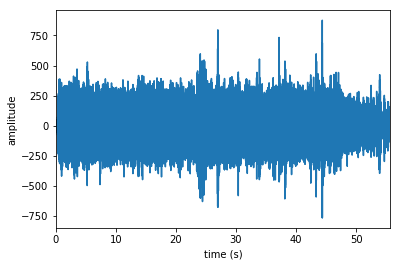

In [91]:
# plt.figure(figsize=(30, 4))
# plt.fill_between(times, snd[:,0], snd[:,1], color='k') 

times = np.arange(0, len(snd), 1)
times = times / sampling_rate

y = snd
# y = y - snd.mean()

plt.xlim(times[0], times[-1])
plt.plot(times, y)

plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

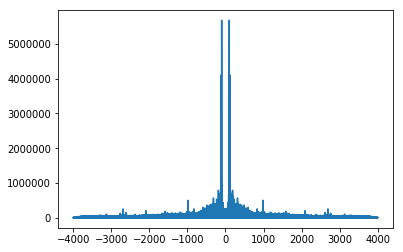

In [81]:

# y = snd - snd.mean()
y = snd
yf = np.abs(fftpack.fft(y))
xf = fftpack.fftfreq(len(y), 1/sampling_rate)

plt.plot(xf, yf)
plt.show()

8000


/home/dufferzafar/.apps/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7178: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


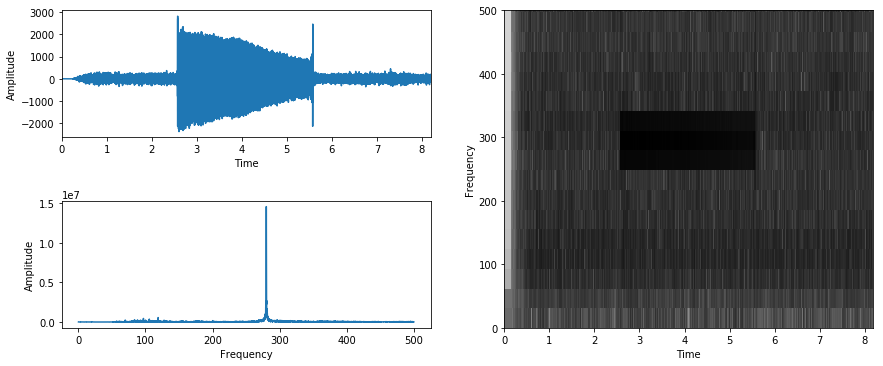

In [148]:
def plot_sensor(readings, sampling_rate=200, zero_mean=False):
    plot_sig(readings, sampling_rate, zero_mean)
    
def plot_wav(wavfilename, zero_mean=False, freq_max=None):
    sampling_rate, snd = wavfile.read(wavfilename)
    print(sampling_rate)
    plot_sig(snd, sampling_rate, zero_mean, freq_max)

def plot_sig(y, sampling_rate, zero_mean=False, freq_max=None):
            
    if zero_mean:
        y = y - y.mean()
        
    times = np.arange(0, len(y), 1)
    times = times / sampling_rate

    fig = plt.gcf()
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(223)
    ax3 = fig.add_subplot(122)
       
    fig.set_size_inches(12, 5)
    fig.tight_layout()

    # Plot the sound wave itself
    ax1.set_xlim(times[0], times[-1])
    ax1.plot(times, y)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    
    # Plot the FFT of the sound wave
    yf = np.abs(fftpack.fft(y))
    xf = fftpack.fftfreq(len(y), 1/sampling_rate)

    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Amplitude')
    
    if freq_max:
        pos = xf < freq_max
        xf, yf = xf[pos], yf[pos]
    
    pos = xf > 0
    
    ax2.plot(xf[pos], yf[pos])

    # Matplotlib spectogram
    # mode = default', 'psd', 'complex', 'magnitude', 'angle', 'phase'
    pxx, freqs, bins, im = ax3.specgram(y, Fs=sampling_rate, mode="magnitude", 
                                        cmap=plt.get_cmap('Greys'))
    
    if freq_max:
        ax3.set_ylim((0, freq_max))
    
    ax3.set_xlabel("Time")
    ax3.set_ylabel("Frequency")
    
    plt.subplots_adjust(hspace=0.5, wspace=0.20)
    plt.show()
    
# A recording with a 280 Hz tone
plot_wav("data_sensez/audio_2018-05-02-07-55-07.wav", zero_mean=True, freq_max=500)

# Miscellaneous
# plot_wav("data_sensez/audio_2018-04-29-13-02-11.wav", zero_mean=True)
# plot_wav("data_sensez/audio_2018-04-24-15-42-21.wav", zero_mean=True)
# plot_wav("data_sensez/audio_2018-04-24-15-41-34.wav", zero_mean=True)

# plot_sensor(df['z'], 200, zero_mean=True)
# plot_sensor(df['z'], 200)

## New Data Fun!

In [7]:
def read_csv(fname):
    headers = ["t", "x", "y", "z"]
    return pd.read_csv(fname, names=headers)

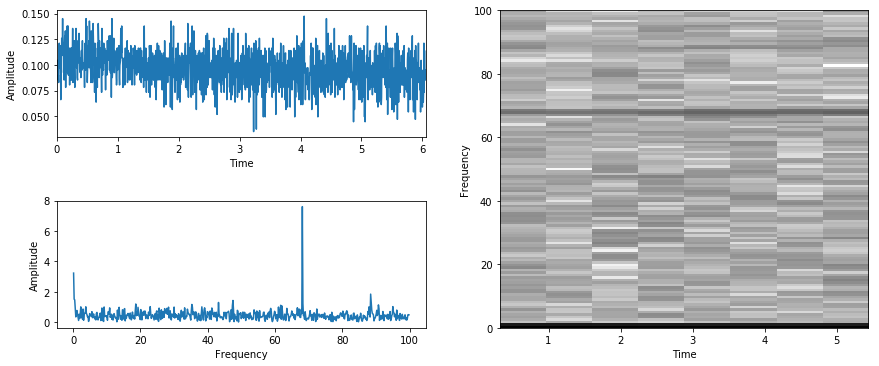

In [141]:
df = read_csv("data_sensez/accelerometer_2018-05-11-00-13-53.csv")

plot_sensor(df["x"], 200)

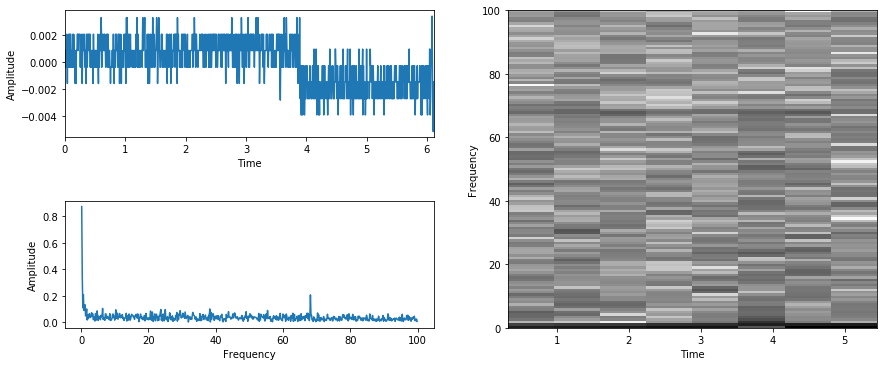

In [146]:
df = read_csv("data_sensez/gyroscope_2018-05-11-00-13-53.csv")

plot_sensor(df["z"], 200, zero_mean=True)

/home/dufferzafar/.apps/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7178: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


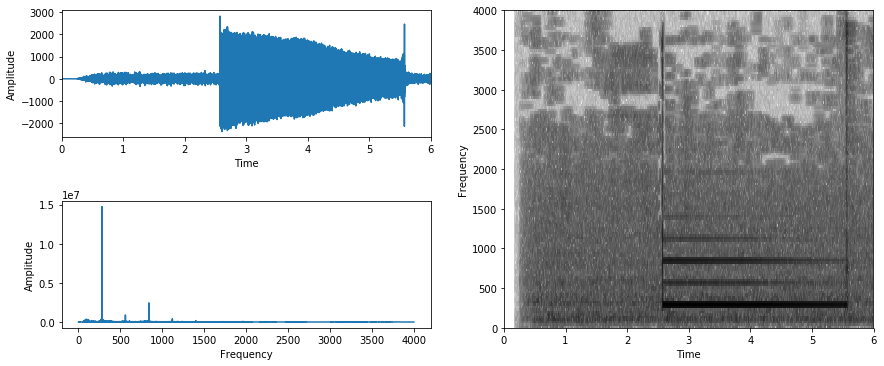

In [147]:
plot_wav("data_sensez/audio_2018-05-02-07-55-07_2.wav")

/home/dufferzafar/.apps/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7178: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


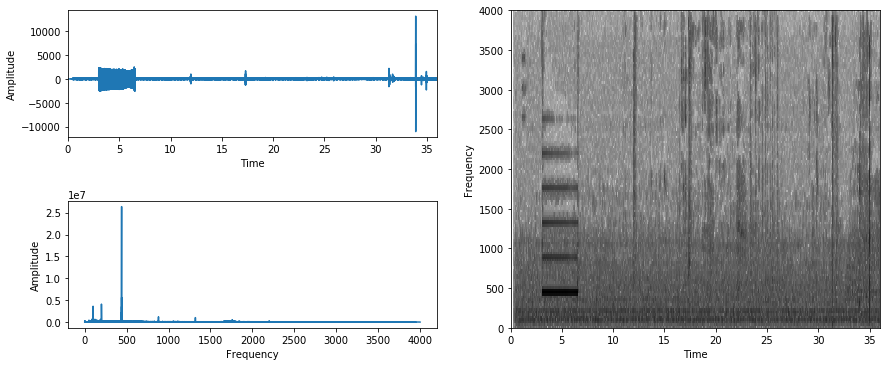

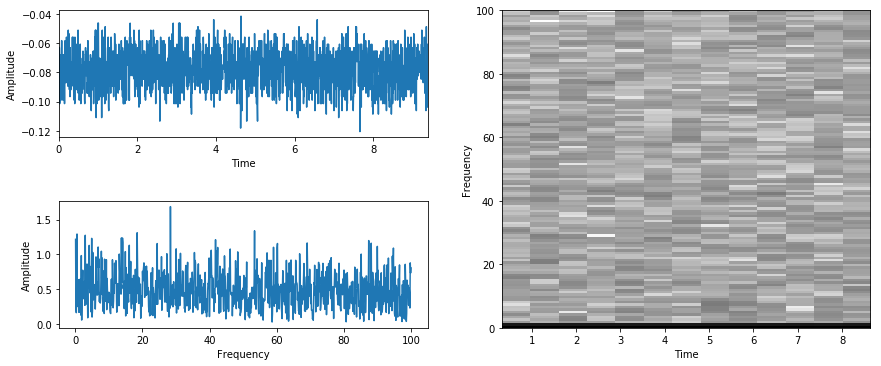

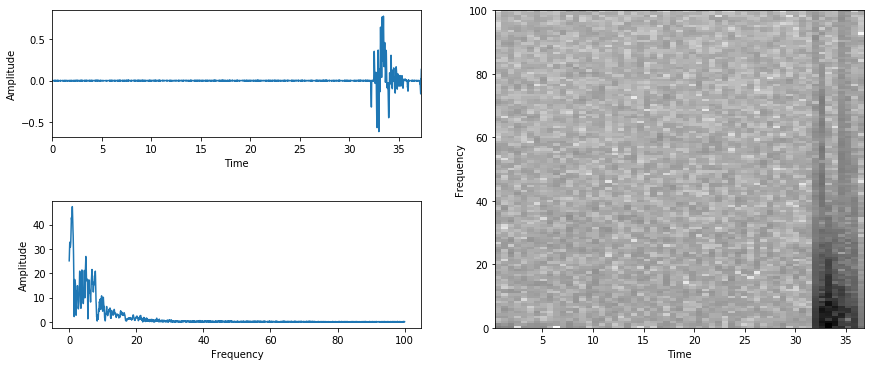

In [134]:
plot_wav("data_sensez/audio_2018-05-11-23-23-04.wav")

df = read_csv("data_sensez/accelerometer_2018-05-11-23-23-04.csv")
plot_sensor(df["x"])

df = read_csv("data_sensez/gyroscope_2018-05-11-23-23-04.csv")
plot_sensor(df["z"])